<a href="https://colab.research.google.com/github/Goshikhar23/DL-back-to-the-basics/blob/master/MPNeuron%26Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MP-Neuron

Import Data

In [ ]:
import sklearn.datasets
import numpy as np

## Preparing data

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
X = breast_cancer.data
Y = breast_cancer.target

In [ ]:
print(X, Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [ ]:
print(X.shape, Y.shape)

(569, 30) (569,)


## Convert into dataframe

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)
data['class'] = Y

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Describe data

In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
data.groupby(data['class']).describe()

mean radius                       ... worst fractal dimension                  
            count       mean       std  ...                     50%       75%     max
class                                   ...                                          
0           212.0  17.462830  3.203971  ...                 0.08760  0.102625  0.2075
1           357.0  12.146524  1.780512  ...                 0.07712  0.085410  0.1486

[2 rows x 240 columns]

In [ ]:
print(breast_cancer.target_names)

['malignant' 'benign']


## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('class', axis=1)
Y = data['class']

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (426, 30) (143, 30)


Specifying test_size

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (512, 30) (57, 30)


In [ ]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.63671875 0.543859649122807


We want to split in the ratio of the classes 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify= Y)

In [ ]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


Always split in the same fashion

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify= Y, random_state=1)

## Binarization of input

In [ ]:
import matplotlib.pyplot as plt

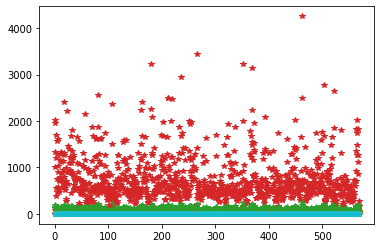

In [ ]:
plt.plot(X_train, '*')
plt.show()

Transpose to show for each feature 

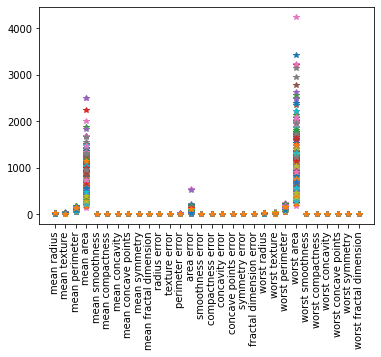

In [ ]:
plt.plot(X_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[0,1])
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[0,1])

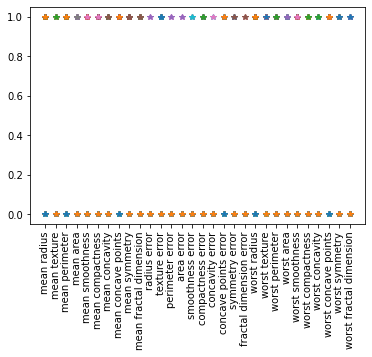

In [ ]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
type(X_binarised_train)

pandas.core.frame.DataFrame

Converting into numpy array

In [ ]:
X_binarised_train =X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [ ]:
type(X_binarised_train)

numpy.ndarray

## MP Model

In [ ]:
# b= threshold
for b in range(X_binarised_train.shape[1]+ 1):
  Y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarised_train, Y_train):
    y_pred= (np.sum(x)>=b) # 0 if less than b and 1 if greater than b
    Y_pred_train.append(y_pred)
    accurate_rows+=(y==y_pred)
  
  print(b, accurate_rows/X_binarised_train.shape[0])
  


0 0.626953125
1 0.240234375
2 0.185546875
3 0.150390625
4 0.154296875
5 0.181640625
6 0.21484375
7 0.244140625
8 0.275390625
9 0.298828125
10 0.3125
11 0.328125
12 0.3359375
13 0.34375
14 0.3515625
15 0.357421875
16 0.3671875
17 0.369140625
18 0.373046875
19 0.373046875
20 0.373046875
21 0.373046875
22 0.373046875
23 0.373046875
24 0.373046875
25 0.373046875
26 0.373046875
27 0.373046875
28 0.373046875
29 0.373046875
30 0.373046875


It seems that accuracy is max when b=0 i.e it follows that in the dataset 1 is more than 0. Also, for 1 $x_i$ is smaller than for 0. So, if we inverted the binarization, accuracy will be good

In [ ]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])
X_binarised_train =X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [ ]:
for b in range(X_binarised_train.shape[1]+ 1):
  Y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarised_train, Y_train):
    y_pred= (np.sum(x)>=b) # 0 if less than b and 1 if greater than b
    Y_pred_train.append(y_pred)
    accurate_rows+=(y==y_pred)
  
  print(b, accurate_rows/X_binarised_train.shape[0])


0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


Max at b=28!

## Model Inference

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
b=28 
Y_pred_test = []

for x in X_binarised_test:
  y_pred = (np.sum(x)>=b)
  Y_pred_test.append(y_pred)
accuracy = accuracy_score(Y_test, Y_pred_test)
print(b, accuracy)


28 0.7894736842105263


# MPNeuron class

In [ ]:
class MPNeuron():

  def __init__(self):
    self.b = None
  
  def model(self,x):
    return (sum(x)>=self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy={}

    for b in range(X.shape[1]+1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b]= accuracy_score(Y, Y_pred)

    best_b = max(accuracy, key= accuracy.get)
    self.b=best_b

    print('Optimal value of b is', best_b)
    print('Highest accuracy is ', accuracy[best_b])


In [ ]:
mpNeuron = MPNeuron()
mpNeuron.fit(X_binarised_train,Y_train)

Optimal value of b is 28
Highest accuracy is  0.849609375


In [ ]:
Y_test_pred = mpNeuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test,Y_pred_test)

In [ ]:
print(accuracy_test)

0.7894736842105263


# Perceptron Class

$y=1, \mbox{if}\sum_i w_ix_i >=b$

$y=0, \mbox{otherwise}$

In [ ]:
class Perceptron():

  def __init__(self):
    self.b = None
    self.w = None
  
  def model(self, x):
    return (np.dot(self.w,x)>=b)

  def predict(self, X):
    Y = []
    for x in X:
      result= self.model(x)
      Y.append(result)
    return np.array(Y)
      

  def fit(self, X, Y):

    self.w = np.ones(X.shape[1])
    self.b = 0

    #Perceptron learning algorithm
    for x, y in zip(X, Y):
      y_pred = self.model(x)
      if y==1 and y_pred==0: 
        self.w = self.w + x
        self.b +=1
      elif y==0 and y_pred==1:
        self.w = self.w - x
        self.b-=1
        

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)

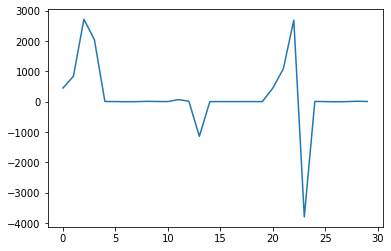

In [ ]:
plt.plot(perceptron.w)
plt.show()

In [ ]:
Y_pred_train = perceptron.predict(X_train)
#Training accuracy
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(accuracy_train)

0.373046875


In [ ]:
Y_pred_test = perceptron.predict(X_test)
#Testing accuracy
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print(accuracy_test)

0.3684210526315789


SO low!

## Introducing Epochs

In [ ]:
class Perceptron_with_epochs():

  def __init__(self):
    self.b = None
    self.w = None
  
  def model(self, x):
    return (np.dot(self.w,x)>=b)

  def predict(self, X):
    Y = []
    for x in X:
      result= self.model(x)
      Y.append(result)
    return np.array(Y)
      

  def fit(self, X, Y, epochs =1):

    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0

    #Perceptron learning algorithm
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y==1 and y_pred==0: 
          self.w = self.w + x
          self.b +=1
        elif y==0 and y_pred==1:
          self.w = self.w - x
          self.b-=1
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if(accuracy[i]>max_accuracy):
        max_accuracy = accuracy[i]

    print(max_accuracy)
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.show()
        

In [ ]:
perceptron_with_epochs = Perceptron_with_epochs()

0.919921875


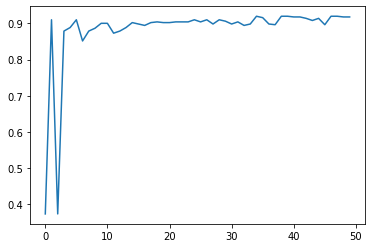

In [ ]:
perceptron_with_epochs.fit(X_train, Y_train, 50)

In [ ]:
Y_pred_train = perceptron_with_epochs.predict(X_train)
#Training accuracy
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(accuracy_train)

0.91796875


## Introducing checkpoints to store optimal w and b at max_accuracy

In [ ]:
class Perceptron_with_epochs_and_checkpoints():

  def __init__(self):
    self.b = None
    self.w = None
  
  def model(self, x):
    return (np.dot(self.w,x)>=b)

  def predict(self, X):
    Y = []
    for x in X:
      result= self.model(x)
      Y.append(result)
    return np.array(Y)
      

  def fit(self, X, Y, epochs =1):

    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0

    #Perceptron learning algorithm
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y==1 and y_pred==0: 
          self.w = self.w + x
          self.b +=1
        elif y==0 and y_pred==1:
          self.w = self.w - x
          self.b-=1
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if(accuracy[i]>max_accuracy):
        max_accuracy = accuracy[i]
        #checkpoints
        cpktw = self.w
        cpktb = self.b
    
    self.w = cpktw
    self.b = cpktb
    print(max_accuracy)
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.show()
        

In [ ]:
perceptron_with_epochs_and_checkpoints = Perceptron_with_epochs_and_checkpoints()

0.919921875


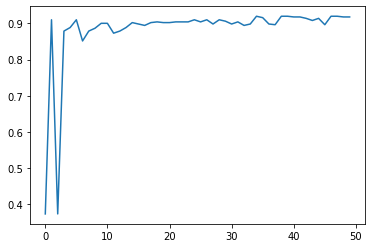

In [ ]:
perceptron_with_epochs_and_checkpoints.fit(X_train, Y_train, 50)

In [ ]:
Y_pred_train = perceptron_with_epochs_and_checkpoints.predict(X_train)
#Training accuracy
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print(accuracy_train)

0.919921875


## Introducing learning rate

In [ ]:
class Perceptron_with_epochs_and_checkpoints_and_lr():

  def __init__(self):
    self.b = None
    self.w = None
  
  def model(self, x):
    return (np.dot(self.w,x)>=b)

  def predict(self, X):
    Y = []
    for x in X:
      result= self.model(x)
      Y.append(result)
    return np.array(Y)
      

  def fit(self, X, Y, epochs =1, lr=1):

    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0

    #Perceptron learning algorithm
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y==1 and y_pred==0: 
          # Learning rate
          self.w = self.w + lr*x
          self.b = self.b + lr*1
        elif y==0 and y_pred==1:
          self.w = self.w - lr*x
          self.b-=lr*1
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if(accuracy[i]>max_accuracy):
        max_accuracy = accuracy[i]
        #checkpoints
        cpktw = self.w
        cpktb = self.b
    
    self.w = cpktw
    self.b = cpktb
    print(max_accuracy)
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.ylim([0,1])
    plt.show()
        

In [ ]:
perceptron_with_epochs_and_checkpoints_and_lr = Perceptron_with_epochs_and_checkpoints_and_lr()

0.916015625


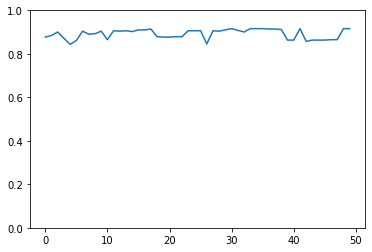

In [ ]:
perceptron_with_epochs_and_checkpoints_and_lr.fit(X_train, Y_train, 50, .0001)

In [ ]:
Y_pred_test = perceptron_with_epochs_and_checkpoints_and_lr.predict(X_test)
#Testing accuracy
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print(accuracy_test)

0.9298245614035088
